In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as sm

In [4]:
df = pd.read_csv('mt_cars.csv')
df.shape

(32, 12)

In [5]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

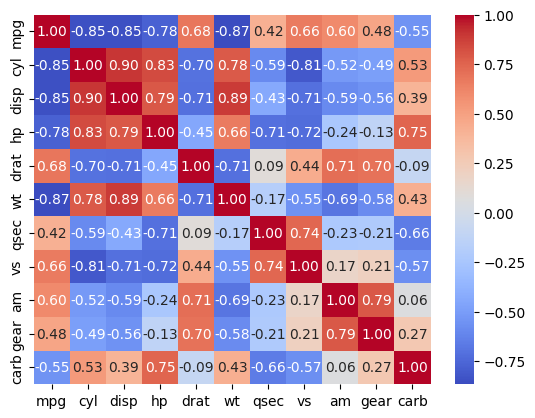

In [12]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

In [13]:
column_pairs = [('mpg','cyl'),('mpg','disp'),('mpg','hp'),('mpg','wt'),('mpg','drat'),('mpg','vs')]

In [14]:
n_plots = len(column_pairs)

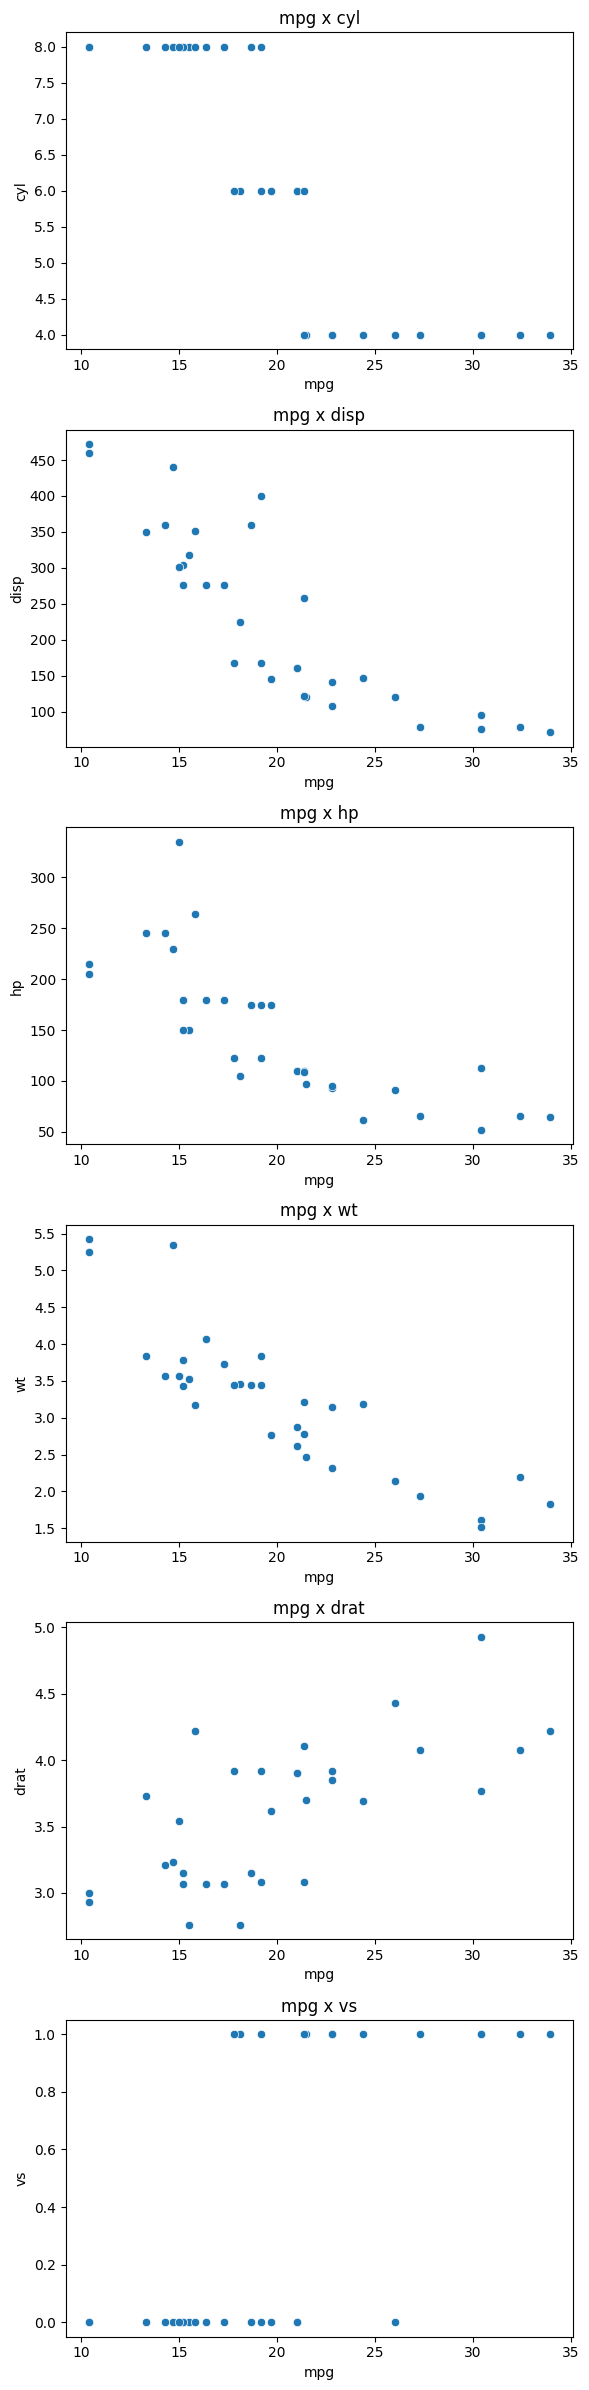

In [15]:
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=df, ax=axes[i])
    axes[i].set_title(f'{x_col} x {y_col}')

plt.tight_layout()
plt.show()

In [32]:
# AIC 156.6 e BIC 162.5
# modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=df)

# AIC 165.1 e BIC 169.5
# modelo = sm.ols(formula='mpg ~ disp + cyl', data=df)

# AIC 179.1 e BIC 183.5
modelo = sm.ols(formula='mpg ~ drat + vs', data=df)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.82e-07
Time:                        12:04:08   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC e BIC
Metrica de regressão -> quanto mais baixo, melhor

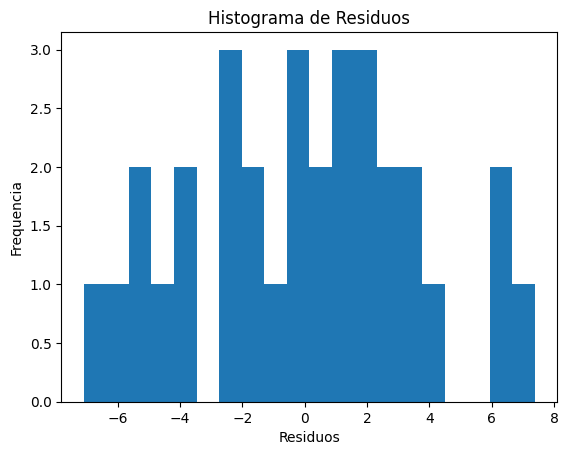

In [33]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

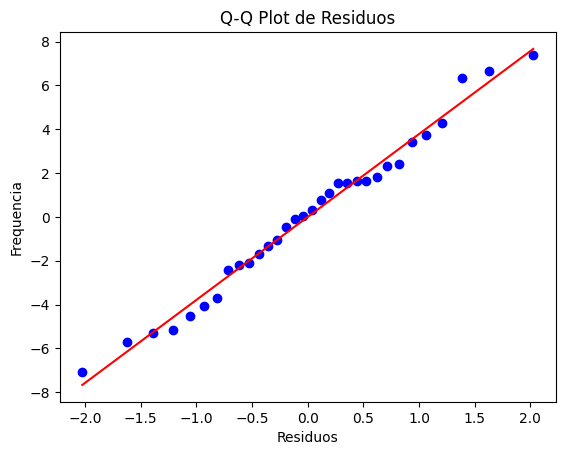

In [34]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Q-Q Plot de Residuos")
plt.show()

In [35]:
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statistica: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statistica: 0.981, p-value: 0.822
